# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# 2. Data Loading & Splitting

In [ ]:
# Load dataset
df = pd.read_csv('real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,104,2012.750,0.0,208.3905,6,24.95618,121.53844,45.7
1,302,2012.750,38.0,461.7848,0,24.97229,121.53445,35.7
2,199,2013.083,34.0,157.6052,7,24.96628,121.54196,39.1
3,389,2013.500,10.4,2251.9380,4,24.95957,121.51353,27.3
4,269,2013.417,17.2,390.5684,5,24.97937,121.54245,40.1
...,...,...,...,...,...,...,...,...
409,222,2013.333,9.0,1402.0160,0,24.98569,121.52760,38.5
410,163,2012.750,16.0,4066.5870,0,24.94297,121.50342,11.6
411,151,2013.250,35.8,170.7311,7,24.96719,121.54269,48.5
412,84,2012.917,25.3,2707.3920,3,24.96056,121.50831,17.7


In [4]:
# Size of Dataset
R = df.shape[0]
C = df.shape[1]
print(f"Number of rows: {R}")
print(f"Number of columns: {C}")

Number of rows: 414
Number of columns: 8


In [5]:
# Split the dataset into training and testing sets
df_test = df.iloc[:R//5 + 1, :]
df_test

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,104,2012.750,0.0,208.3905,6,24.95618,121.53844,45.7
1,302,2012.750,38.0,461.7848,0,24.97229,121.53445,35.7
2,199,2013.083,34.0,157.6052,7,24.96628,121.54196,39.1
3,389,2013.500,10.4,2251.9380,4,24.95957,121.51353,27.3
4,269,2013.417,17.2,390.5684,5,24.97937,121.54245,40.1
...,...,...,...,...,...,...,...,...
78,399,2013.417,14.7,1717.1930,2,24.96447,121.51649,23.0
79,7,2012.667,34.5,623.4731,7,24.97933,121.53642,40.3
80,309,2013.417,16.4,289.3248,5,24.98203,121.54348,53.0
81,119,2013.500,25.3,1583.7220,3,24.96622,121.51709,30.6


In [6]:
df_train = df.iloc[R//5 + 1:, :]
df_train

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
83,180,2013.083,14.0,438.85130,1,24.97493,121.52730,42.6
84,185,2012.750,14.1,2615.46500,0,24.95495,121.56174,21.8
85,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
86,81,2013.500,11.8,533.47620,4,24.97445,121.54765,40.3
87,370,2012.667,20.2,2185.12800,3,24.96322,121.51237,22.8
...,...,...,...,...,...,...,...,...
409,222,2013.333,9.0,1402.01600,0,24.98569,121.52760,38.5
410,163,2012.750,16.0,4066.58700,0,24.94297,121.50342,11.6
411,151,2013.250,35.8,170.73110,7,24.96719,121.54269,48.5
412,84,2012.917,25.3,2707.39200,3,24.96056,121.50831,17.7


# 3. EDA & Data Preprocessing

### 3.1 Training Data

In [7]:
# Size of Dataset
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 331
Number of columns: 8


In [8]:
# Drop unnecessary columns
df_train = df_train.drop(['No'], axis=1)
df_train = df_train.reset_index(drop=True)
df_train.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [9]:
headers = ["Transaction date", "House age", "Distance to the nearest MRT station",
           "Number of convenience stores", "Latitude", "Longitude", "House price of unit area"]
df_train.columns = headers
df_train.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [10]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_train = df_train.loc[:,~df_train.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [11]:
# Check for missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     331 non-null    float64
 1   House age                            331 non-null    float64
 2   Distance to the nearest MRT station  331 non-null    float64
 3   Number of convenience stores         331 non-null    int64  
 4   Latitude                             331 non-null    float64
 5   Longitude                            331 non-null    float64
 6   House price of unit area             331 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 18.2 KB


In [12]:
# Remove row with missing values
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     331 non-null    float64
 1   House age                            331 non-null    float64
 2   Distance to the nearest MRT station  331 non-null    float64
 3   Number of convenience stores         331 non-null    int64  
 4   Latitude                             331 non-null    float64
 5   Longitude                            331 non-null    float64
 6   House price of unit area             331 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 18.2 KB


In [13]:
# Drop duplicated rows
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])

Number of duplicated rows: 0

Removing duplicates...

Number of duplicated rows: 0


In [14]:
# Show non-numeric columns
# print("Non-numeric columns:")
# print(sorted(list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))))

In [15]:
# Encode categorical columns
# categorical_cols = list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))

# for col in categorical_cols:
#     mapping = dict()
#     values = sorted(df_train[col].unique())

#     for i in range(len(values)):
#         mapping[values[i]] = i

#     enc_map =[{'col': col, 'mapping': mapping}]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_train = enc.fit_transform(df_train)

# X = df_train.drop(['Sales'], axis=1)
# y = df_train['Sales']
# X = pd.get_dummies(X)
# df_train = pd.concat([X, y], axis=1)
# df_train

In [16]:
# Separate features and labels
y = df_train['House price of unit area']
X = df_train.drop(['House price of unit area'], axis=1)

<Axes: >

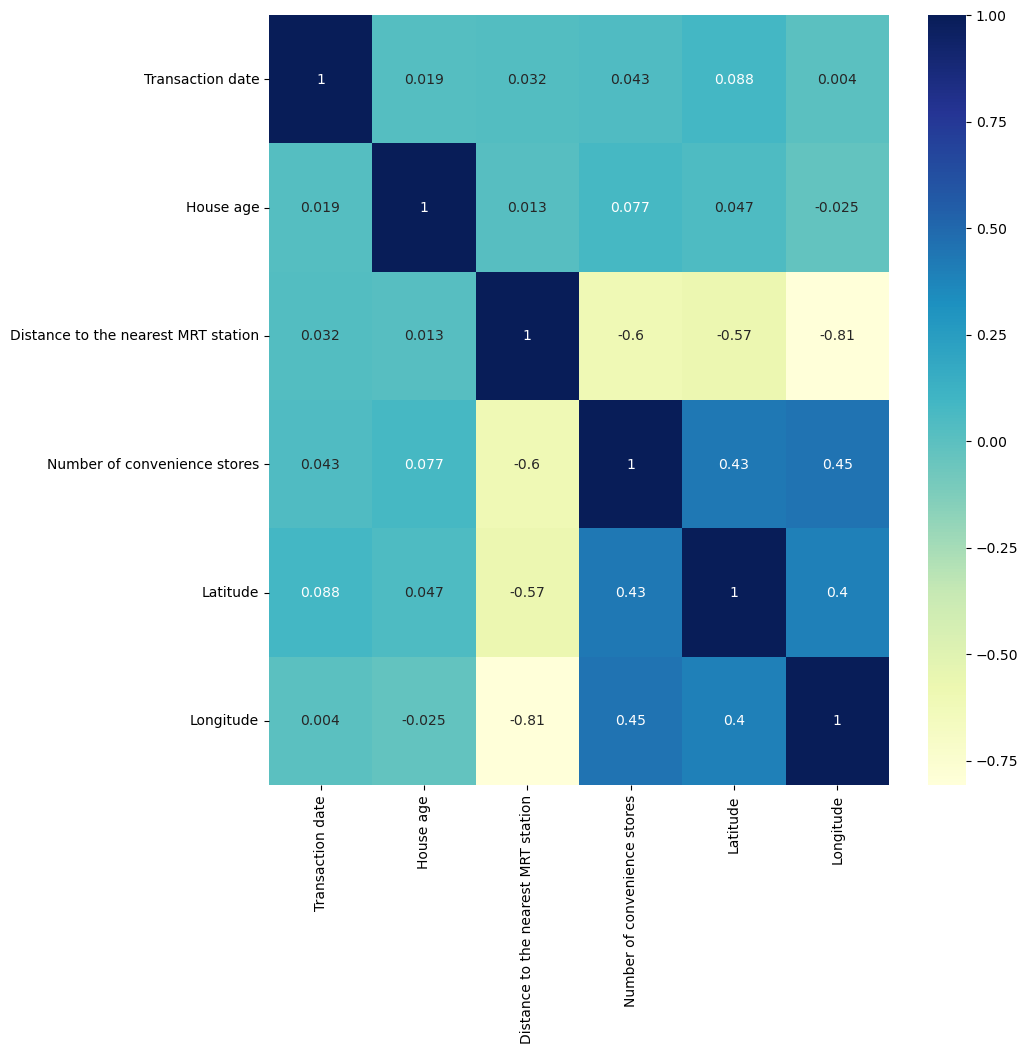

In [17]:
# Displaying heatmap
plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(method="pearson"), cmap="YlGnBu", annot=True)

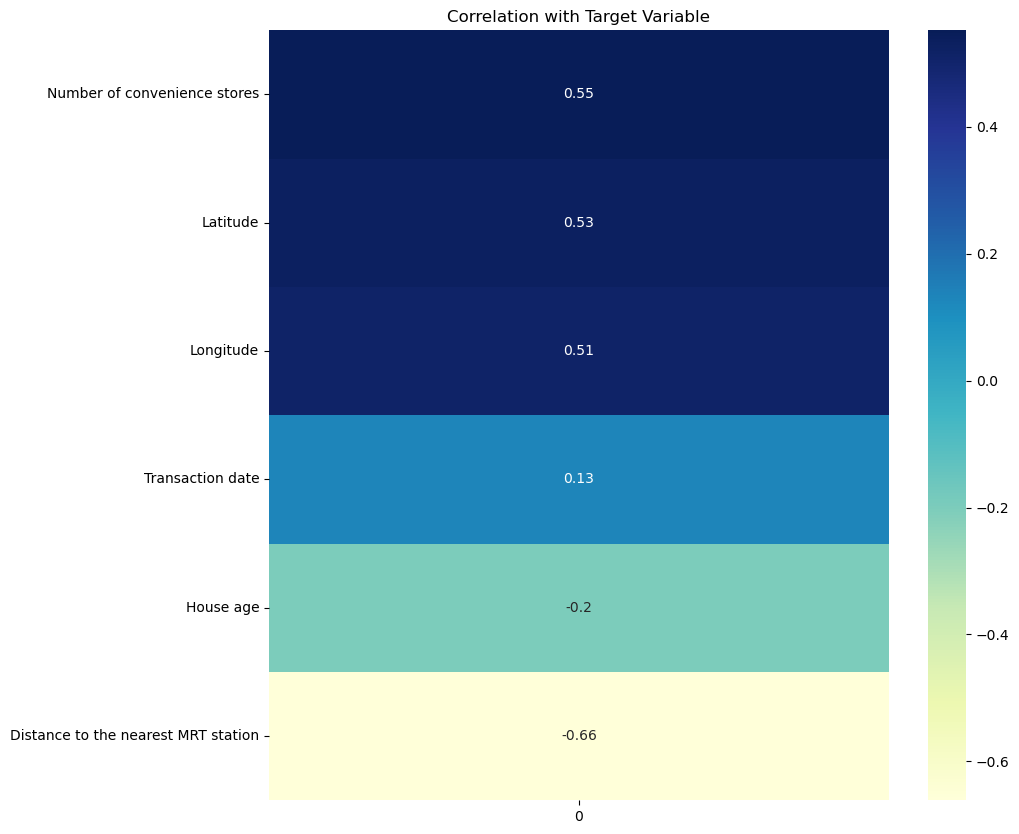

In [18]:
# Create a correlation matrix with target variable
corr_with_target = X.corrwith(y)
corr_with_target = corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_with_target.to_frame(), cmap='YlGnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

**Important**: We detect outliers BEFORE creating polynomial features because:
1. Polynomial features amplify outliers exponentially (outlier² creates extreme values)
2. One outlier affects multiple polynomial features simultaneously  
3. This prevents model instability in polynomial regression

In [19]:
# Check for outliers in numerical columns before polynomial features
numerical_columns = list(df_train.select_dtypes(include=[np.number]).columns.values)

In [20]:
def detect_outliers_iqr(df, column):    
    """
    Detect outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

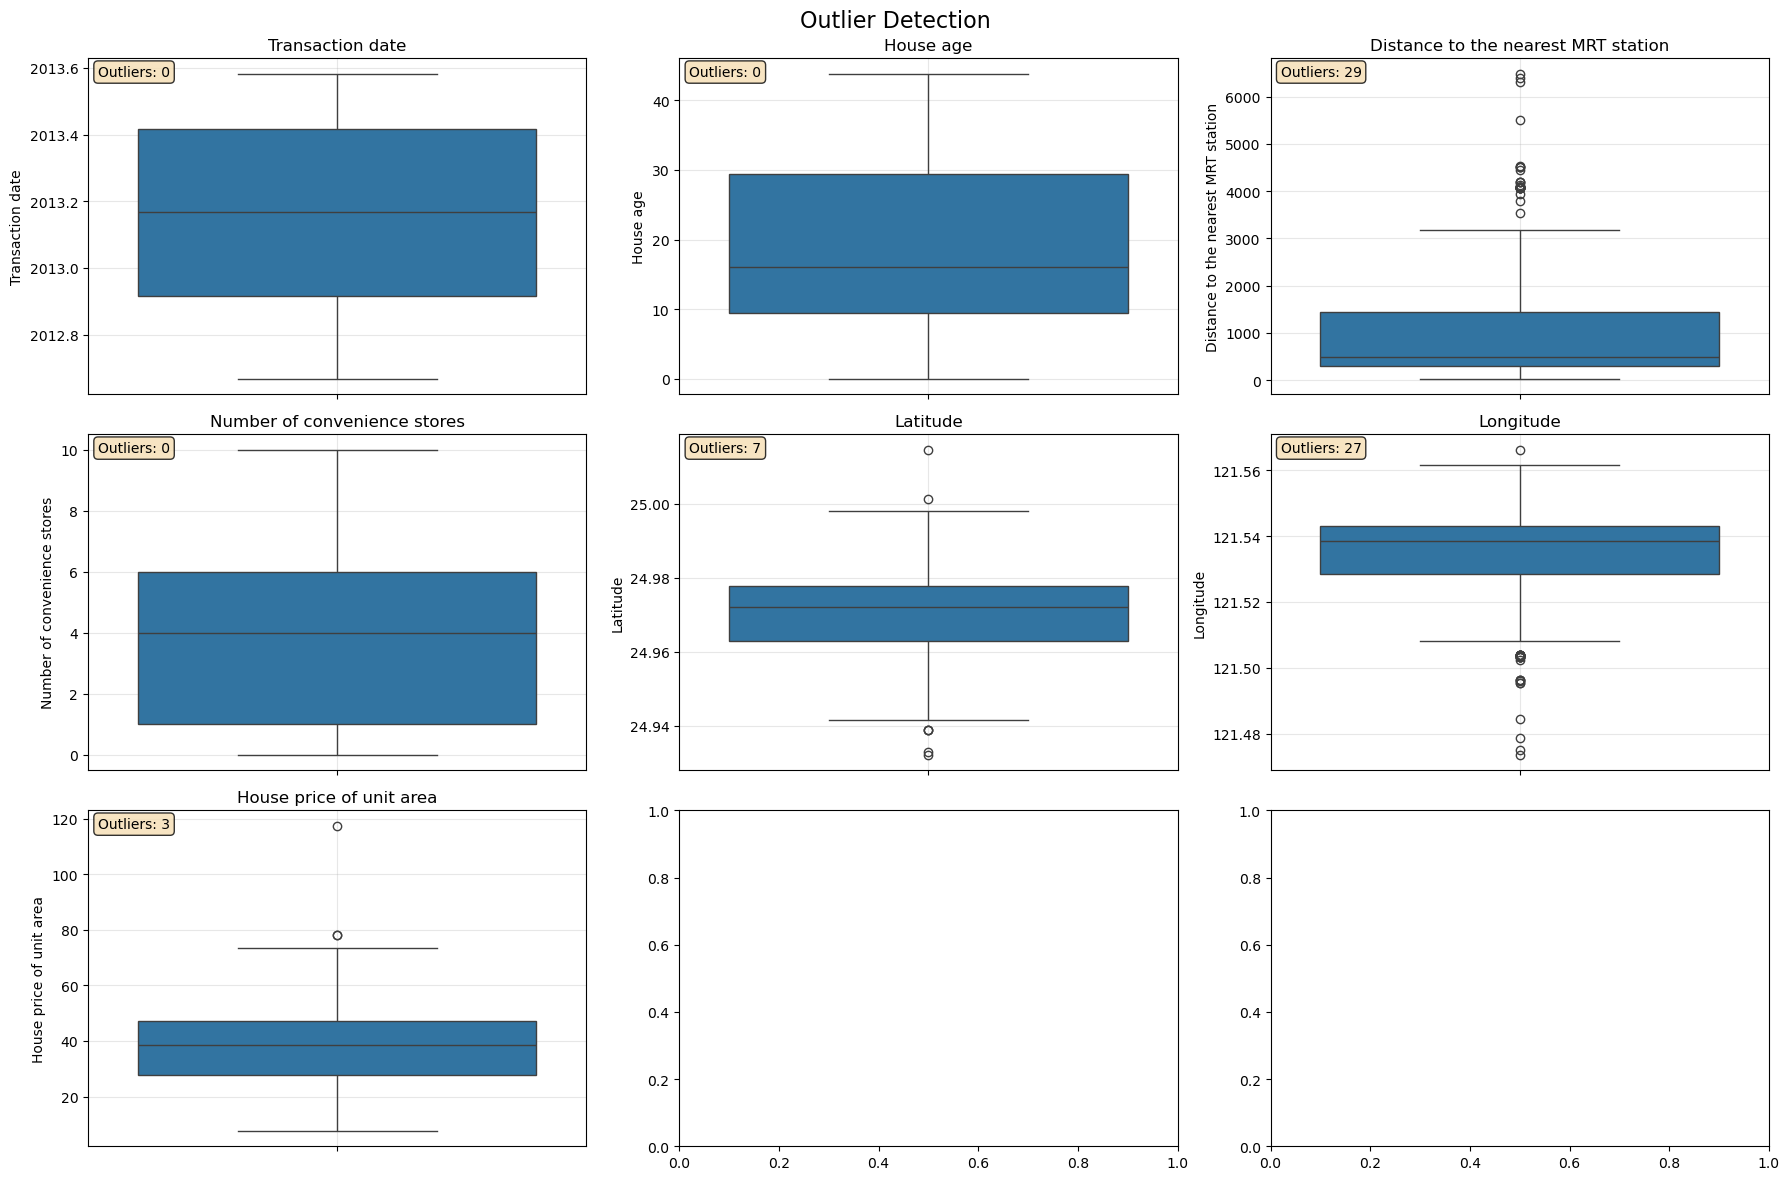

In [21]:
# Create box plots for all numerical features to visualize outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection', fontsize=16)

lower_bounds = dict()
upper_bounds = dict()

for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    
    # Create box plot
    sns.boxplot(data=df_train, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add outlier count as text
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_train, col)
    lower_bounds[col] = lower_bound
    upper_bounds[col] = upper_bound
    
    axes[row, col_idx].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col_idx].transAxes,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [22]:
# # Remove outliers based on IQR method
# for i, col in enumerate(numerical_columns):
    
#     df_train = df_train[df_train[col] >= lower_bounds[col]]
#     df_train = df_train.reset_index(drop=True)
#     df_train = df_train[df_train[col] <= upper_bounds[col]]
#     df_train = df_train.reset_index(drop=True)

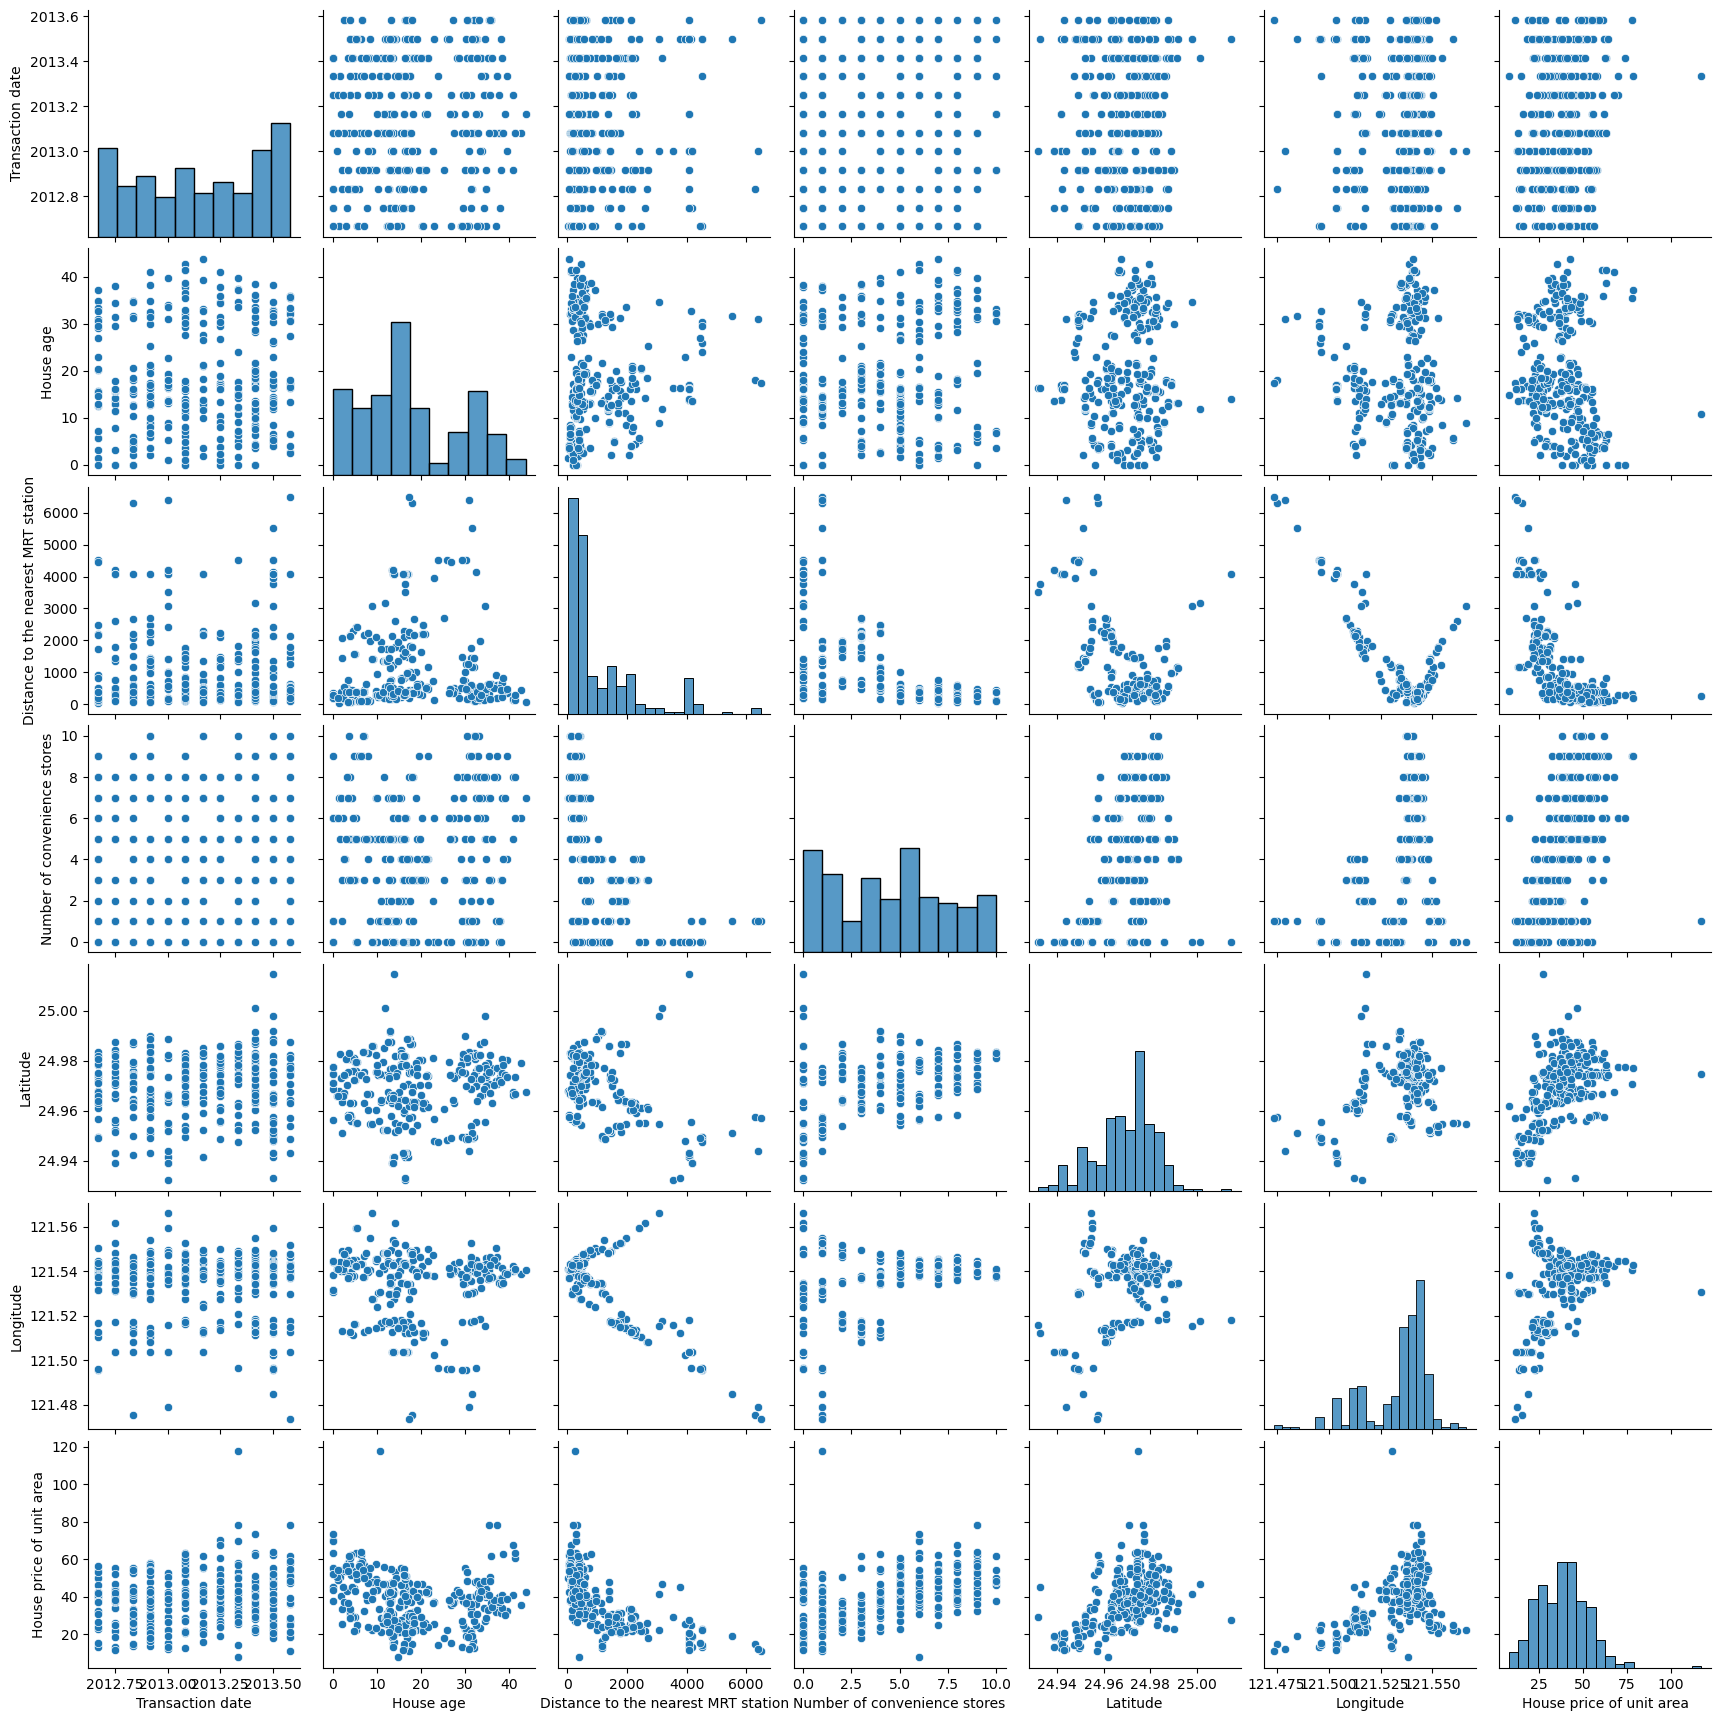

In [23]:
sns.pairplot(df_train)

In [24]:
df_train.describe()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2013.150571,17.921752,1079.070680,4.090634,24.969219,121.533330,38.260121
std,0.283331,11.403878,1257.747669,2.939429,0.012527,0.015192,14.031954
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.400000,289.324800,1.000000,24.962990,121.528570,27.900000
50%,2013.167000,16.100000,492.231300,4.000000,24.971980,121.538630,38.400000
75%,2013.417000,29.350000,1442.932500,6.000000,24.977695,121.543100,47.050000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [25]:
# Separate features and labels
y_train = df_train['House price of unit area']
X_train = df_train.drop(['House price of unit area'], axis=1)

In [26]:
# MinMax Scaling
numeric_cols = X_train.select_dtypes(include='number').columns

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_train[numeric_cols] = scaler_X.fit_transform(X_train[numeric_cols])
y_train = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
pd.DataFrame(y_train, columns=['House price of unit area'])

,House price of unit area
0,0.318471
1,0.129208
2,0.385805
3,0.297543
4,0.138308
...,...
326,0.281165
327,0.036397
328,0.372157
329,0.091902


In [27]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)

In [28]:
print(X_train.shape)
print(X_train_poly.shape)

(331, 6)
(331, 28)


In [29]:
X_train = X_train_poly

### 3.2 Testing Data

In [30]:
# Size of Dataset
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 83
Number of columns: 8


In [31]:
# Drop unnecessary columns
df_test = df_test.drop(['No'], axis=1)
df_test = df_test.reset_index(drop=True)
df_test.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [32]:
headers = ["Transaction date", "House age", "Distance to the nearest MRT station",
           "Number of convenience stores", "Latitude", "Longitude", "House price of unit area"]
df_test.columns = headers
df_test.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [33]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_test = df_test.loc[:,~df_test.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [34]:
# Check for missing values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     83 non-null     float64
 1   House age                            83 non-null     float64
 2   Distance to the nearest MRT station  83 non-null     float64
 3   Number of convenience stores         83 non-null     int64  
 4   Latitude                             83 non-null     float64
 5   Longitude                            83 non-null     float64
 6   House price of unit area             83 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.7 KB


In [35]:
# Remove row with missing values
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     83 non-null     float64
 1   House age                            83 non-null     float64
 2   Distance to the nearest MRT station  83 non-null     float64
 3   Number of convenience stores         83 non-null     int64  
 4   Latitude                             83 non-null     float64
 5   Longitude                            83 non-null     float64
 6   House price of unit area             83 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.7 KB


In [36]:
# Separate features and labels
y_test = df_test['House price of unit area']
X_test = df_test.drop(['House price of unit area'], axis=1)

In [37]:
# MinMax Scaling
numeric_cols = X_test.select_dtypes(include='number').columns

X_test[numeric_cols] = scaler_X.transform(X_test[numeric_cols])
y_test = scaler_Y.transform(y_test.values.reshape(-1, 1)).flatten()
pd.DataFrame(y_test, columns=['House price of unit area'])

,House price of unit area
0,0.346679
1,0.255687
2,0.286624
3,0.179254
4,0.295723
...,...
78,0.140127
79,0.297543
80,0.413103
81,0.209281


In [38]:
X_test_poly=poly.transform(X_test)

In [39]:
print(X_test.shape)
print(X_test_poly.shape)

(83, 6)
(83, 28)


In [40]:
X_test = X_test_poly

# 4. Polynomial Regression

In [41]:
# Model training
model = LinearRegression().fit(X_train, y_train)
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [42]:
# Evaluate the model

residual_df = None

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = scaler_Y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test = scaler_Y.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    global residual_df
    residual_df = pd.DataFrame({'Y_Test': y_test, 'Y_Pred': y_pred, 'Residuals':(y_test-y_pred) }).head(5)
    
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE:", mae)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)
    rmse = math.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, y_pred)
    print("R^2:", r2)

print("Polynomial Regression")
evaluate_model(model, X_test, y_test)

Polynomial Regression
MAE: 4.6712843561746995
MSE: 33.206680372996516
RMSE: 5.7625237850265325
R^2: 0.7573041048330759


In [43]:
residual_df

,Y_Test,Y_Pred,Residuals
0,45.7,47.202637,-1.502637
1,35.7,40.011914,-4.311914
2,39.1,44.841504,-5.741504
3,27.3,26.274414,1.025586
4,40.1,43.553613,-3.453613


# 5. Tuning

In [44]:
# Train List of RMSE per degree
train_MSE_list=[]
#Test List of RMSE per degree
test_MSE_list=[]
test_r2_list=[]

for d in range(1,10):
    # Separate features and labels
    y_train = df_train['House price of unit area']
    X_train = df_train.drop(['House price of unit area'], axis=1)
    y_test = df_test['House price of unit area']
    X_test = df_test.drop(['House price of unit area'], axis=1)
    
    # MinMax Scaling
    numeric_cols = X_train.select_dtypes(include='number').columns
    X_train[numeric_cols] = scaler_X.transform(X_train[numeric_cols])
    y_train_unscaled = y_train.copy()
    y_train = scaler_Y.transform(y_train.values.reshape(-1, 1)).flatten()
    
    # MinMax Scaling
    numeric_cols = X_test.select_dtypes(include='number').columns
    X_test[numeric_cols] = scaler_X.transform(X_test[numeric_cols])
    
    poly=PolynomialFeatures(degree=d)
    X_train=poly.fit_transform(X_train)
    X_test=poly.transform(X_test)
    
    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    
    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)
    
    y_train_pred = scaler_Y.inverse_transform(y_train_pred.reshape(-1, 1)).flatten()
    y_test_pred = scaler_Y.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
    
    #Evaluating the Model
    
    #MSE of Train set
    train_MSE = mean_squared_error(y_train_unscaled, y_train_pred)
    
    #MSE of Test Set
    test_MSE = mean_squared_error(y_test, y_test_pred)
    
    # R^2 of Test Set
    r2 = r2_score(y_test, y_test_pred)
    
    #Append the MSE to the Train and Test List
    
    train_MSE_list.append(train_MSE)
    test_MSE_list.append(test_MSE)
    test_r2_list.append(r2)

In [45]:
pd.DataFrame({"Degree: ": list(range(1, 10)), 'Train MSE': train_MSE_list}).round(4)

,Degree:,Train MSE
0,1,85.5051
1,2,66.3047
2,3,42.5223
3,4,20.9123
4,5,0.4245
5,6,0.4245
6,7,0.4245
7,8,0.4245
8,9,0.4245


In [46]:
pd.DataFrame({"Degree: ": list(range(1, 10)), 'Test MSE':test_MSE_list, "R^2": test_r2_list}).round(4)

,Degree:,Test MSE,R^2
0,1,4.475510e+01,6.729000e-01
1,2,3.320670e+01,7.573000e-01
2,3,5.341770e+01,6.096000e-01
3,4,1.025904e+03,-6.498000e+00
4,5,9.844459e+14,-7.194967e+12
5,6,1.850942e+14,-1.352788e+12
6,7,2.105692e+14,-1.538976e+12
7,8,2.969472e+15,-2.170282e+13
8,9,3.702684e+14,-2.706161e+12
